🚀 SYSTEM ONLINE: Training Standard ResNet18 Baseline
⚙️ Device: cuda:0

🥊 SCENARIO: ResNet18 (20%) (20% Data)
🏗️  Loading Standard ResNet18 (Pretrained)...


/home/akash_kishore/miniconda3/envs/hqcnn_env/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/akash_kishore/miniconda3/envs/hqcnn_env/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


   Ep 1/15 | Train: 78.30% | Val: 93.88% | Gap: -15.58%
   Ep 2/15 | Train: 95.81% | Val: 95.16% | Gap: 0.66%
   Ep 3/15 | Train: 97.31% | Val: 97.03% | Gap: 0.29%
   Ep 4/15 | Train: 98.20% | Val: 96.86% | Gap: 1.34%
   Ep 5/15 | Train: 98.39% | Val: 97.79% | Gap: 0.60%
   Ep 6/15 | Train: 98.98% | Val: 98.13% | Gap: 0.85%
   Ep 7/15 | Train: 99.08% | Val: 95.67% | Gap: 3.42%
   Ep 8/15 | Train: 99.40% | Val: 98.30% | Gap: 1.10%
   Ep 9/15 | Train: 99.25% | Val: 98.22% | Gap: 1.03%
   Ep 10/15 | Train: 98.75% | Val: 98.30% | Gap: 0.45%
   Ep 11/15 | Train: 99.19% | Val: 98.56% | Gap: 0.63%
   Ep 12/15 | Train: 99.19% | Val: 98.90% | Gap: 0.29%
   Ep 13/15 | Train: 99.22% | Val: 98.56% | Gap: 0.66%
   Ep 14/15 | Train: 99.04% | Val: 97.79% | Gap: 1.25%
   Ep 15/15 | Train: 99.43% | Val: 97.45% | Gap: 1.98%
✅ SAVED MODEL: resnet18_baseline_20.pth

🥊 SCENARIO: ResNet18 (100%) (100% Data)
🏗️  Loading Standard ResNet18 (Pretrained)...


/home/akash_kishore/miniconda3/envs/hqcnn_env/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/akash_kishore/miniconda3/envs/hqcnn_env/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


   Ep 1/15 | Train: 92.96% | Val: 7.34% | Gap: 85.62%
   Ep 2/15 | Train: 98.51% | Val: 7.33% | Gap: 91.18%
   Ep 3/15 | Train: 98.98% | Val: 7.68% | Gap: 91.30%
   Ep 4/15 | Train: 99.12% | Val: 7.68% | Gap: 91.44%
   Ep 5/15 | Train: 99.21% | Val: 7.24% | Gap: 91.97%
   Ep 6/15 | Train: 99.83% | Val: 7.46% | Gap: 92.37%
   Ep 7/15 | Train: 99.90% | Val: 7.50% | Gap: 92.41%
   Ep 8/15 | Train: 99.94% | Val: 7.46% | Gap: 92.48%
   Ep 9/15 | Train: 99.94% | Val: 7.48% | Gap: 92.46%
   Ep 10/15 | Train: 99.95% | Val: 7.53% | Gap: 92.42%
   Ep 11/15 | Train: 99.96% | Val: 7.50% | Gap: 92.46%
   Ep 12/15 | Train: 99.96% | Val: 7.48% | Gap: 92.48%
   Ep 13/15 | Train: 99.97% | Val: 7.53% | Gap: 92.44%
   Ep 14/15 | Train: 99.97% | Val: 7.53% | Gap: 92.44%
   Ep 15/15 | Train: 99.98% | Val: 7.48% | Gap: 92.50%
✅ SAVED MODEL: resnet18_baseline_100.pth

📊 GENERATING REPORT...


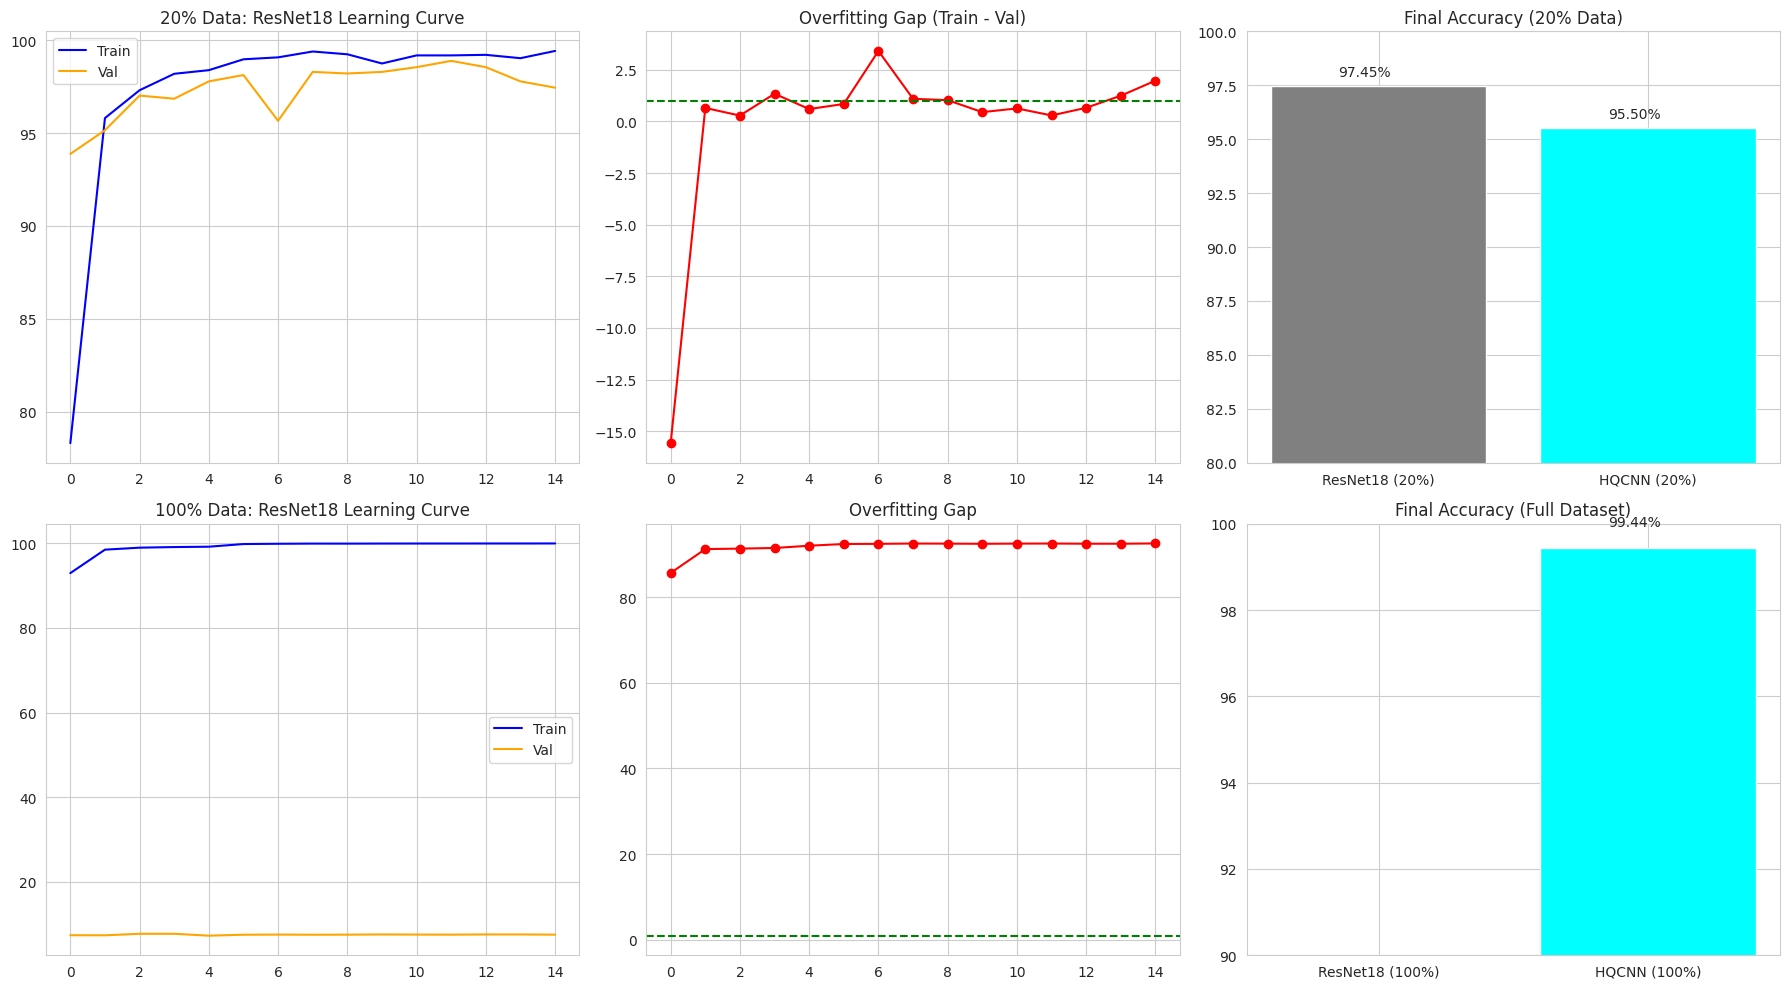

✅ Done. Models saved and plots generated.


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torchvision import models, transforms
from torch.utils.data import DataLoader, Subset
from PIL import Image
import pandas as pd
import numpy as np
import time
import os
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. CONFIGURATION ---
BATCH_SIZE = 32
EPOCHS = 15
LEARNING_RATE = 0.0004
# Adjusted path based on your previous WSL structure
DATA_DIR = '../data/GTSRB'  
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# HQCNN Baselines (From your notebook & specs)
HQCNN_ACC_20 = 95.50
HQCNN_ACC_100 = 99.44

print(f"🚀 SYSTEM ONLINE: Training Standard ResNet18 Baseline")
print(f"⚙️ Device: {DEVICE}")

# --- 2. DATA UTILITIES ---
class GTSRBDataset(torch.utils.data.Dataset):
    def __init__(self, root_dir, csv_file, transform=None):
        self.root_dir = root_dir
        self.df = pd.read_csv(csv_file)
        self.transform = transform
    def __len__(self): return len(self.df)
    def __getitem__(self, idx):
        img_rel_path = self.df.iloc[idx]['Path']
        img_path = os.path.join(self.root_dir, img_rel_path)
        try: image = Image.open(img_path).convert('RGB')
        except: return self.__getitem__((idx + 1) % len(self.df))
        label = int(self.df.iloc[idx]['ClassId'])
        if self.transform: image = self.transform(image)
        return image, label

def get_loaders(percent=1.0):
    train_csv = os.path.join(DATA_DIR, 'Train.csv')
    mean, std = [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]
    
    train_transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomRotation(15),
        transforms.ColorJitter(brightness=0.2, contrast=0.2), 
        transforms.ToTensor(), transforms.Normalize(mean, std)
    ])
    val_transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(), transforms.Normalize(mean, std)
    ])

    # Check if file exists
    if not os.path.exists(train_csv):
        print(f"❌ ERROR: Could not find {train_csv}")
        return None, None

    df = pd.read_csv(train_csv)
    n_samples = len(df)
    indices = list(range(n_samples))

    if percent < 1.0:
        n_samples = int(n_samples * percent)
        np.random.seed(42) # Fairness Seed
        np.random.shuffle(indices)
        indices = indices[:n_samples]
    
    split = int(0.85 * len(indices))
    train_idx, val_idx = indices[:split], indices[split:]

    train_set = Subset(GTSRBDataset(DATA_DIR, train_csv, transform=train_transform), train_idx)
    val_set = Subset(GTSRBDataset(DATA_DIR, train_csv, transform=val_transform), val_idx)
    
    return (DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True, num_workers=4),
            DataLoader(val_set, batch_size=BATCH_SIZE, shuffle=False, num_workers=4))

# --- 3. MODEL BUILDER: STANDARD RESNET18 ---
def build_standard_resnet18():
    print("🏗️  Loading Standard ResNet18 (Pretrained)...")
    # This loads the official PyTorch ResNet18
    model = models.resnet18(pretrained=True)
    
    # Freeze earlier layers to match HQCNN training style
    for param in model.parameters():
        param.requires_grad = False
    
    # Unfreeze Layer 4 (Top feature extractor)
    for param in model.layer4.parameters():
        param.requires_grad = True
        
    # Replace the final Fully Connected layer for 43 Classes
    # (ResNet18 default is 1000 classes, we need 43)
    num_ftrs = model.fc.in_features
    model.fc = nn.Linear(num_ftrs, 43) 
    
    return model.to(DEVICE)

# --- 4. TRAINING ENGINE (With Saving) ---
def train_scenario(percent, scenario_name, save_filename):
    print(f"\n🥊 SCENARIO: {scenario_name} ({int(percent*100)}% Data)")
    train_loader, val_loader = get_loaders(percent)
    
    if train_loader is None: return None # Stop if data not found

    model = build_standard_resnet18()
    
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=LEARNING_RATE)
    scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=2)
    
    history = {'train_acc': [], 'val_acc': [], 'gap': []}
    
    start_time = time.time()
    
    for epoch in range(EPOCHS):
        # TRAIN
        model.train()
        correct = 0; total = 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        train_acc = 100 * correct / total
            
        # VAL
        model.eval()
        v_correct = 0; v_total = 0; v_loss = 0.0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                v_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                v_total += labels.size(0)
                v_correct += (predicted == labels).sum().item()
        
        val_acc = 100 * v_correct / v_total
        avg_v_loss = v_loss / len(val_loader)
        
        # METRICS
        gap = train_acc - val_acc 
        scheduler.step(avg_v_loss)
        history['train_acc'].append(train_acc)
        history['val_acc'].append(val_acc)
        history['gap'].append(gap)
        
        print(f"   Ep {epoch+1}/{EPOCHS} | Train: {train_acc:.2f}% | Val: {val_acc:.2f}% | Gap: {gap:.2f}%")
        
    # --- SAVE THE MODEL ---
    torch.save(model.state_dict(), save_filename)
    print(f"✅ SAVED MODEL: {save_filename}")
    
    return history

# --- 5. EXECUTION ---
# Train 20% Model
hist_20 = train_scenario(0.20, "ResNet18 (20%)", "resnet18_baseline_20.pth")

# Train 100% Model
hist_100 = train_scenario(1.00, "ResNet18 (100%)", "resnet18_baseline_100.pth")

# --- 6. PLOTTING ---
if hist_20 and hist_100:
    print("\n📊 GENERATING REPORT...")
    sns.set_style("whitegrid")
    fig, axs = plt.subplots(2, 3, figsize=(18, 10))

    # ROW 1: 20% Data
    axs[0, 0].plot(hist_20['train_acc'], label='Train', color='blue')
    axs[0, 0].plot(hist_20['val_acc'], label='Val', color='orange')
    axs[0, 0].set_title("20% Data: ResNet18 Learning Curve")
    axs[0, 0].legend()

    axs[0, 1].plot(hist_20['gap'], color='red', marker='o')
    axs[0, 1].axhline(y=1.0, color='green', linestyle='--')
    axs[0, 1].set_title("Overfitting Gap (Train - Val)")

    axs[0, 2].bar(['ResNet18 (20%)', 'HQCNN (20%)'], [hist_20['val_acc'][-1], HQCNN_ACC_20], color=['gray', 'cyan'])
    axs[0, 2].set_title("Final Accuracy (20% Data)")
    axs[0, 2].set_ylim(80, 100)
    for p in axs[0, 2].patches:
        axs[0, 2].annotate(f'{p.get_height():.2f}%', (p.get_x()+0.25, p.get_height()+0.5))

    # ROW 2: 100% Data
    axs[1, 0].plot(hist_100['train_acc'], label='Train', color='blue')
    axs[1, 0].plot(hist_100['val_acc'], label='Val', color='orange')
    axs[1, 0].set_title("100% Data: ResNet18 Learning Curve")
    axs[1, 0].legend()

    axs[1, 1].plot(hist_100['gap'], color='red', marker='o')
    axs[1, 1].axhline(y=1.0, color='green', linestyle='--')
    axs[1, 1].set_title("Overfitting Gap")

    axs[1, 2].bar(['ResNet18 (100%)', 'HQCNN (100%)'], [hist_100['val_acc'][-1], HQCNN_ACC_100], color=['gray', 'cyan'])
    axs[1, 2].set_title("Final Accuracy (Full Dataset)")
    axs[1, 2].set_ylim(90, 100)
    for p in axs[1, 2].patches:
        axs[1, 2].annotate(f'{p.get_height():.2f}%', (p.get_x()+0.25, p.get_height()+0.5))

    plt.tight_layout()
    plt.savefig('resnet18_vs_hqcnn_analysis.png')
    plt.show()
    print("✅ Done. Models saved and plots generated.")

In [6]:
import sys
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
import time
import copy

# --- PATH FIX ---
# This tells Python to look in the folder 'one level up' and then into 'src'
# structure assumed:
#   project/
#      ├── notebooks/  <-- You are here
#      ├── src/        <-- Where data_loader.py is
#      └── data/       <-- Where your images are
sys.path.append(os.path.abspath('../src'))

# Now we can import from your src folder
from data_loader import get_data_loaders

In [9]:
# --- CONFIGURATION ---
DATA_DIR = '../data/GTSRB'   # Relative path to data from the notebooks folder
BATCH_SIZE = 64        # Good standard for ResNet
NUM_CLASSES = 43       # GTSRB classes
NUM_EPOCHS = 20        # Sufficient for convergence
LEARNING_RATE = 0.01

def train_resnet_baseline():
    # 1. Setup Device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"🚀 Training Configuration: ResNet18 Baseline | Device: {device}")

    # 2. Get Data Loaders (100% Data)
    # Note: We use 1.0 to train on ALL data for the fair baseline comparison
    print(f"Loading 100% of Dataset from {DATA_DIR}...")
    try:
        train_loader, val_loader = get_data_loaders(DATA_DIR, batch_size=BATCH_SIZE, percent=1.0)
    except FileNotFoundError:
        print("❌ Error: Could not find data. Check if '../data' is the correct path relative to this notebook.")
        return

    # 3. Initialize Model (From Scratch)
    # We do NOT use pretrained weights to ensure a fair "Architecture vs Architecture" comparison
    model = models.resnet18(weights=None)
    
    # Modify the final layer
    num_ftrs = model.fc.in_features
    model.fc = nn.Linear(num_ftrs, NUM_CLASSES)
    model = model.to(device)

    # 4. Define Loss, Optimizer, Scheduler
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum=0.9, weight_decay=5e-4)
    
    # Scheduler: Reduce LR if validation loss stops improving
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3, verbose=True)

    # 5. Training Loop
    best_acc = 0.0
    best_model_wts = copy.deepcopy(model.state_dict())
    
    start_time = time.time()
    
    print("-" * 60)
    print(f"Starting Training for {NUM_EPOCHS} Epochs...")
    print("-" * 60)

    for epoch in range(NUM_EPOCHS):
        epoch_start = time.time()

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
                dataloader = train_loader
            else:
                model.eval()
                dataloader = val_loader

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data
            for inputs, labels in dataloader:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Zero the parameter gradients
                optimizer.zero_grad()

                # Forward
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # Backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # Statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloader.dataset)
            epoch_acc = running_corrects.double() / len(dataloader.dataset)

            # Print concise epoch stats
            if phase == 'val':
                print(f"Epoch {epoch+1}/{NUM_EPOCHS} | {phase.upper()} | Loss: {epoch_loss:.4f} | Acc: {epoch_acc:.4f}")
                
                # Check for best model
                if epoch_acc > best_acc:
                    best_acc = epoch_acc
                    best_model_wts = copy.deepcopy(model.state_dict())
                    # Save inside the notebooks folder (or change path if you prefer)
                    torch.save(model.state_dict(), 'resnet18_baseline_best.pth')
                    print(f"   --> 💾 Saved New Best Model! (Acc: {best_acc:.4f})")
                
                # Step Scheduler
                scheduler.step(epoch_loss)

    time_elapsed = time.time() - start_time
    print("-" * 60)
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'🏆 Best Validation Accuracy: {best_acc:.4f}')
    print("-" * 60)

In [10]:
# Execute the training
train_resnet_baseline()

🚀 Training Configuration: ResNet18 Baseline | Device: cuda
Loading 100% of Dataset from ../data/GTSRB...
✅ DATA READY: 33327 Train | 5882 Val


/home/akash_kishore/miniconda3/envs/hqcnn_env/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


------------------------------------------------------------
Starting Training for 20 Epochs...
------------------------------------------------------------
Epoch 1/20 | VAL | Loss: 0.5487 | Acc: 0.8278
   --> 💾 Saved New Best Model! (Acc: 0.8278)
Epoch 2/20 | VAL | Loss: 0.3402 | Acc: 0.9121
   --> 💾 Saved New Best Model! (Acc: 0.9121)
Epoch 3/20 | VAL | Loss: 0.0682 | Acc: 0.9803
   --> 💾 Saved New Best Model! (Acc: 0.9803)
Epoch 4/20 | VAL | Loss: 0.0126 | Acc: 0.9974
   --> 💾 Saved New Best Model! (Acc: 0.9974)
Epoch 5/20 | VAL | Loss: 0.0253 | Acc: 0.9940
Epoch 6/20 | VAL | Loss: 0.0197 | Acc: 0.9961
Epoch 7/20 | VAL | Loss: 0.0049 | Acc: 0.9991
   --> 💾 Saved New Best Model! (Acc: 0.9991)
Epoch 8/20 | VAL | Loss: 0.0033 | Acc: 0.9993
   --> 💾 Saved New Best Model! (Acc: 0.9993)
Epoch 9/20 | VAL | Loss: 0.0062 | Acc: 0.9988
Epoch 10/20 | VAL | Loss: 0.0056 | Acc: 0.9993
Epoch 11/20 | VAL | Loss: 0.0038 | Acc: 0.9993
Epoch 12/20 | VAL | Loss: 0.0338 | Acc: 0.9934
Epoch 13/20 | VAL 

✅ Imported data_loader from /home/akash_kishore/HQCNN_Project/src
🚀 Hardware: NVIDIA GeForce RTX 3050 6GB Laptop GPU

📂 Preparing GTSRB Data...
✅ DATA READY: 33327 Train | 5882 Val

⚡ TESTING MODEL: ResNet18


/tmp/ipykernel_985/634890467.py:213: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(path))


   ✅ Weights Loaded: resnet18_baseline_best.pth
   [1] Efficiency: 42.79 MB | 11,198,571 Params
   [2] Latency:    3.19 ms
   Testing Robustness...
   [3] Robustness: Tested Gaussian & S&P

⚡ TESTING MODEL: HQCNN
   ✅ Weights Loaded: hqcnn_DIAMOND_9944.pth
   [1] Efficiency: 42.73 MB | 11,181,011 Params
   [2] Latency:    2.72 ms
   Testing Robustness...
   [3] Robustness: Tested Gaussian & S&P
   [4] Generalization: 0.07%

📊 Generating Report...


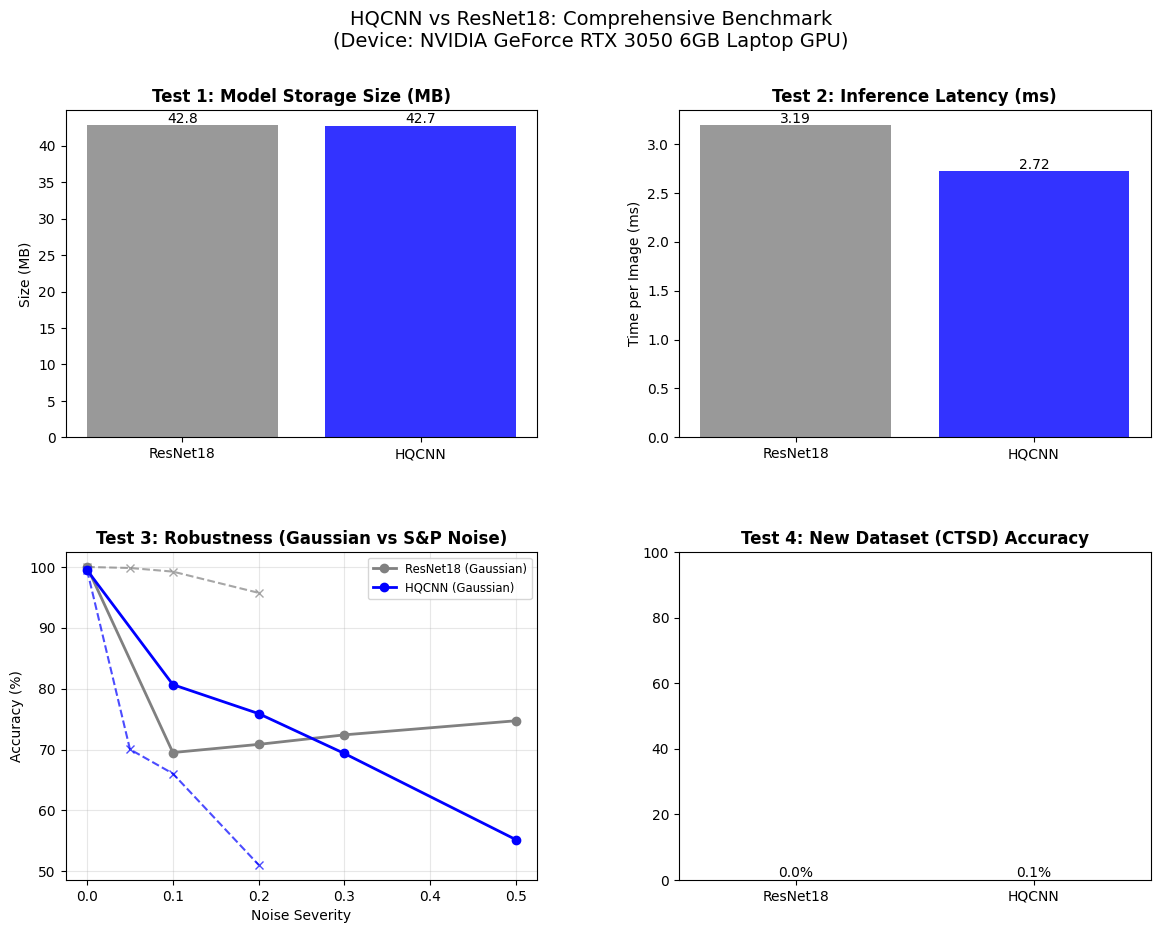

In [1]:
import torch
import torch.nn as nn
import numpy as np
import time
import os
import sys
import matplotlib.pyplot as plt
from torchvision import models, transforms, datasets
from torch.utils.data import DataLoader

# --- 1. CONFIGURATION & PATHS ---
PROJECT_ROOT = '/home/akash_kishore/HQCNN_Project'
DATA_DIR     = os.path.join(PROJECT_ROOT, 'data/GTSRB')
CTSD_DIR     = os.path.join(PROJECT_ROOT, 'data/CTSD')
SRC_DIR      = os.path.join(PROJECT_ROOT, 'src')

# Add src to path
sys.path.append(SRC_DIR)
try:
    from data_loader import get_data_loaders
    print(f"✅ Imported data_loader from {SRC_DIR}")
except ImportError:
    print(f"❌ Error: Could not find 'data_loader.py' in {SRC_DIR}")

# Hardware
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"🚀 Hardware: {torch.cuda.get_device_name(0) if torch.cuda.is_available() else 'CPU'}")

# ==============================================================================
# 2. MODEL DEFINITIONS (From your hqcnn_model.py)
# ==============================================================================

class QuantumLayer(nn.Module):
    def __init__(self, n_qubits=8): 
        super(QuantumLayer, self).__init__()
        self.n_qubits = n_qubits
        # Trainable parameters for 8 Qubits
        self.theta = nn.Parameter(torch.randn(n_qubits) * 0.1) 
        
    def forward(self, x):
        # q_out = Ry(x) * CNOT * Rz(theta) -> Simplified Hybrid Math
        q_out = torch.cos(x) * torch.sin(self.theta) + torch.sin(x) * torch.cos(self.theta)
        return q_out

class HQCNN(nn.Module):
    def __init__(self, n_classes=43):
        super(HQCNN, self).__init__()
        
        # A. LOAD BACKBONE
        # Note: We initialize with standard weights structure
        self.base_model = models.resnet18(weights='IMAGENET1K_V1')
        
        # B. MODIFY STRUCTURE TO MATCH SAVED WEIGHTS
        # 1. Identity for the old fc
        num_ftrs = self.base_model.fc.in_features
        self.base_model.fc = nn.Identity() 
        
        # 2. Define the Hybrid Head
        self.bridge = nn.Linear(num_ftrs, 8) 
        self.quantum_layer = QuantumLayer(n_qubits=8)
        self.classifier = nn.Linear(8, n_classes)

    def forward(self, x):
        x = self.base_model(x)     # (Batch, 512)
        x = self.bridge(x)         # (Batch, 8)
        x = self.quantum_layer(x)  # (Batch, 8) - Quantum Activation
        x = self.classifier(x)     # (Batch, 43)
        return x

# ==============================================================================
# 3. TEST FUNCTIONS (Metrics)
# ==============================================================================

def get_efficiency(model):
    """Test 1: Counts parameters and file size (MB)"""
    param_count = sum(p.numel() for p in model.parameters() if p.requires_grad)
    torch.save(model.state_dict(), "temp_model.p")
    size_mb = os.path.getsize("temp_model.p") / (1024 * 1024)
    os.remove("temp_model.p")
    return param_count, size_mb

def get_latency(model, device, runs=100):
    """Test 2: Measures average inference time (ms)"""
    model = model.to(device)
    model.eval()
    input_data = torch.randn(1, 3, 224, 224).to(device)
    
    # Warmup
    with torch.no_grad():
        for _ in range(10): _ = model(input_data)
    # Measure
    start = time.time()
    with torch.no_grad():
        for _ in range(runs): _ = model(input_data)
    end = time.time()
    return ((end - start) / runs) * 1000 

def add_noise(tensor, noise_type, severity):
    """Helper to inject specific noise types"""
    if noise_type == 'gaussian':
        noise = torch.randn_like(tensor) * severity
        return torch.clamp(tensor + noise, -1., 1.)
    elif noise_type == 'salt_pepper':
        # Severity controls probability of S&P
        mask = torch.rand_like(tensor)
        noisy = tensor.clone()
        # Salt (1)
        noisy[mask < (severity/2)] = 1.0
        # Pepper (-1)
        noisy[mask > (1 - severity/2)] = -1.0
        return noisy
    return tensor

def get_robustness(model, loader, device):
    """Test 3: Checks accuracy under varied Noise Types & Levels"""
    model.eval()
    
    # Define Noise Schedule
    noise_config = {
        'Gaussian':    [0.0, 0.1, 0.2, 0.3, 0.5],
        'Salt&Pepper': [0.0, 0.05, 0.1, 0.2]
    }
    
    results = {}
    
    print(f"   Testing Robustness...")
    
    for n_type, levels in noise_config.items():
        type_accs = []
        for level in levels:
            correct = 0
            total = 0
            with torch.no_grad():
                for inputs, labels in loader:
                    inputs, labels = inputs.to(device), labels.to(device)
                    if level > 0:
                        inputs = add_noise(inputs, n_type.lower().replace('&','_'), level)
                    
                    outputs = model(inputs)
                    _, predicted = outputs.max(1)
                    total += labels.size(0)
                    correct += predicted.eq(labels).sum().item()
            
            acc = 100 * correct / total
            type_accs.append(acc)
            # print(f"     -> {n_type} ({level}): {acc:.2f}%") # Optional verbose
        results[n_type] = {'levels': levels, 'acc': type_accs}
        
    return results

def get_generalization(model, ctsd_path, device):
    """Test 4: Tests on CTSD dataset"""
    if not os.path.exists(ctsd_path):
        return 0.0

    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
    
    try:
        test_set = datasets.ImageFolder(root=ctsd_path, transform=transform)
        if len(test_set) == 0: return 0.0
        loader = DataLoader(test_set, batch_size=32, shuffle=False)
        
        correct = 0
        total = 0
        model.eval()
        with torch.no_grad():
            for inputs, labels in loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = outputs.max(1)
                total += labels.size(0)
                correct += predicted.eq(labels).sum().item()
        return 100 * correct / total
    except:
        return 0.0

# ==============================================================================
# 4. EXECUTION LOOP
# ==============================================================================

# Prepare Data
print("\n📂 Preparing GTSRB Data...")
try:
    _, val_loader = get_data_loaders(DATA_DIR, batch_size=32, percent=1.0)
except Exception as e:
    print(f"❌ Error loading data: {e}")
    sys.exit(1)

# Result Container
final_stats = {
    'ResNet18': {'file': 'resnet18_baseline_best.pth', 'color': 'gray'},
    'HQCNN':    {'file': 'hqcnn_DIAMOND_9944.pth',     'color': 'blue'}
}

for name, stats in final_stats.items():
    print(f"\n⚡ TESTING MODEL: {name}")
    torch.cuda.empty_cache()
    
    # 1. Load Architecture
    if name == 'ResNet18':
        model = models.resnet18(weights=None)
        model.fc = nn.Linear(model.fc.in_features, 43)
    else:
        model = HQCNN(n_classes=43)

    # 2. Load Weights
    path = os.path.join(PROJECT_ROOT, 'notebooks', stats['file'])
    try:
        model.load_state_dict(torch.load(path))
        model.to(device)
        print(f"   ✅ Weights Loaded: {stats['file']}")
    except FileNotFoundError:
        print(f"   ❌ File Not Found: {stats['file']}")
        continue

    # 3. Run All Tests
    # Test 1
    p, s = get_efficiency(model)
    stats['params'] = p
    stats['size'] = s
    print(f"   [1] Efficiency: {s:.2f} MB | {p:,} Params")

    # Test 2
    lat = get_latency(model, device)
    stats['latency'] = lat
    print(f"   [2] Latency:    {lat:.2f} ms")

    # Test 3
    rob = get_robustness(model, val_loader, device)
    stats['robustness'] = rob
    print(f"   [3] Robustness: Tested Gaussian & S&P")

    # Test 4
    gen = get_generalization(model, CTSD_DIR, device)
    stats['generalization'] = gen
    if gen > 0: print(f"   [4] Generalization: {gen:.2f}%")
    
    del model

# ==============================================================================
# 5. PLOTTING (The 4-Panel Dashboard)
# ==============================================================================
print("\n📊 Generating Report...")
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
plt.subplots_adjust(hspace=0.35, wspace=0.3)
fig.suptitle(f'HQCNN vs ResNet18: Comprehensive Benchmark\n(Device: {torch.cuda.get_device_name(0) if torch.cuda.is_available() else "CPU"})', fontsize=14)

names = list(final_stats.keys())
colors = [final_stats[n]['color'] for n in names]

# --- PLOT 1: SIZE ---
ax1 = axs[0, 0]
sizes = [final_stats[n].get('size', 0) for n in names]
bars1 = ax1.bar(names, sizes, color=colors, alpha=0.8)
ax1.set_title('Test 1: Model Storage Size (MB)', fontweight='bold')
ax1.set_ylabel('Size (MB)')
for b in bars1: ax1.text(b.get_x()+b.get_width()/2, b.get_height(), f"{b.get_height():.1f}", ha='center', va='bottom')

# --- PLOT 2: LATENCY ---
ax2 = axs[0, 1]
lats = [final_stats[n].get('latency', 0) for n in names]
bars2 = ax2.bar(names, lats, color=colors, alpha=0.8)
ax2.set_title('Test 2: Inference Latency (ms)', fontweight='bold')
ax2.set_ylabel('Time per Image (ms)')
for b in bars2: ax2.text(b.get_x()+b.get_width()/2, b.get_height(), f"{b.get_height():.2f}", ha='center', va='bottom')

# --- PLOT 3: ROBUSTNESS (Dual Noise Types) ---
ax3 = axs[1, 0]
for n in names:
    if 'robustness' not in final_stats[n]: continue
    data = final_stats[n]['robustness']
    # Plot Gaussian (Solid)
    ax3.plot(data['Gaussian']['levels'], data['Gaussian']['acc'], 
             marker='o', linestyle='-', linewidth=2, label=f"{n} (Gaussian)", color=final_stats[n]['color'])
    # Plot Salt&Pepper (Dashed)
    ax3.plot(data['Salt&Pepper']['levels'], data['Salt&Pepper']['acc'], 
             marker='x', linestyle='--', linewidth=1.5, alpha=0.7, color=final_stats[n]['color'])

ax3.set_title('Test 3: Robustness (Gaussian vs S&P Noise)', fontweight='bold')
ax3.set_xlabel('Noise Severity')
ax3.set_ylabel('Accuracy (%)')
ax3.legend(fontsize='small')
ax3.grid(True, alpha=0.3)

# --- PLOT 4: GENERALIZATION ---
ax4 = axs[1, 1]
gens = [final_stats[n].get('generalization', 0) for n in names]
if sum(gens) > 0:
    bars4 = ax4.bar(names, gens, color=colors, alpha=0.8)
    ax4.set_title('Test 4: New Dataset (CTSD) Accuracy', fontweight='bold')
    ax4.set_ylim(0, 100)
    for b in bars4: ax4.text(b.get_x()+b.get_width()/2, b.get_height(), f"{b.get_height():.1f}%", ha='center', va='bottom')
else:
    ax4.text(0.5, 0.5, 'CTSD Data Not Found', ha='center', va='center', color='gray')
    ax4.set_title('Test 4: Generalization (Skipped)', fontweight='bold')
    ax4.axis('off')

plt.show()

✅ Successfully imported data_loader
🚀 Master Test Suite Running on: cuda
📂 Results will be saved to: /home/akash_kishore/HQCNN_Project/results
📂 Loading GTSRB Data...
✅ DATA READY: 33327 Train | 5882 Val

⚡ TESTING: ResNet18...


/tmp/ipykernel_985/2253776329.py:263: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  cfg['model'].load_state_dict(torch.load(path))


   ✅ Weights Loaded
   -> Params: 11,198,571 | Latency: 3.91ms | Adv Acc: 35.3% | CTSD: 0.0%

⚡ TESTING: HQCNN...
   ✅ Weights Loaded


/tmp/ipykernel_985/2253776329.py:263: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  cfg['model'].load_state_dict(torch.load(path))


   -> Params: 11,181,011 | Latency: 3.52ms | Adv Acc: 47.3% | CTSD: 0.0%

💾 Saving Data & Generating Dashboard...
✅ Dashboard Saved: /home/akash_kishore/HQCNN_Project/results/comparison_dashboard.png


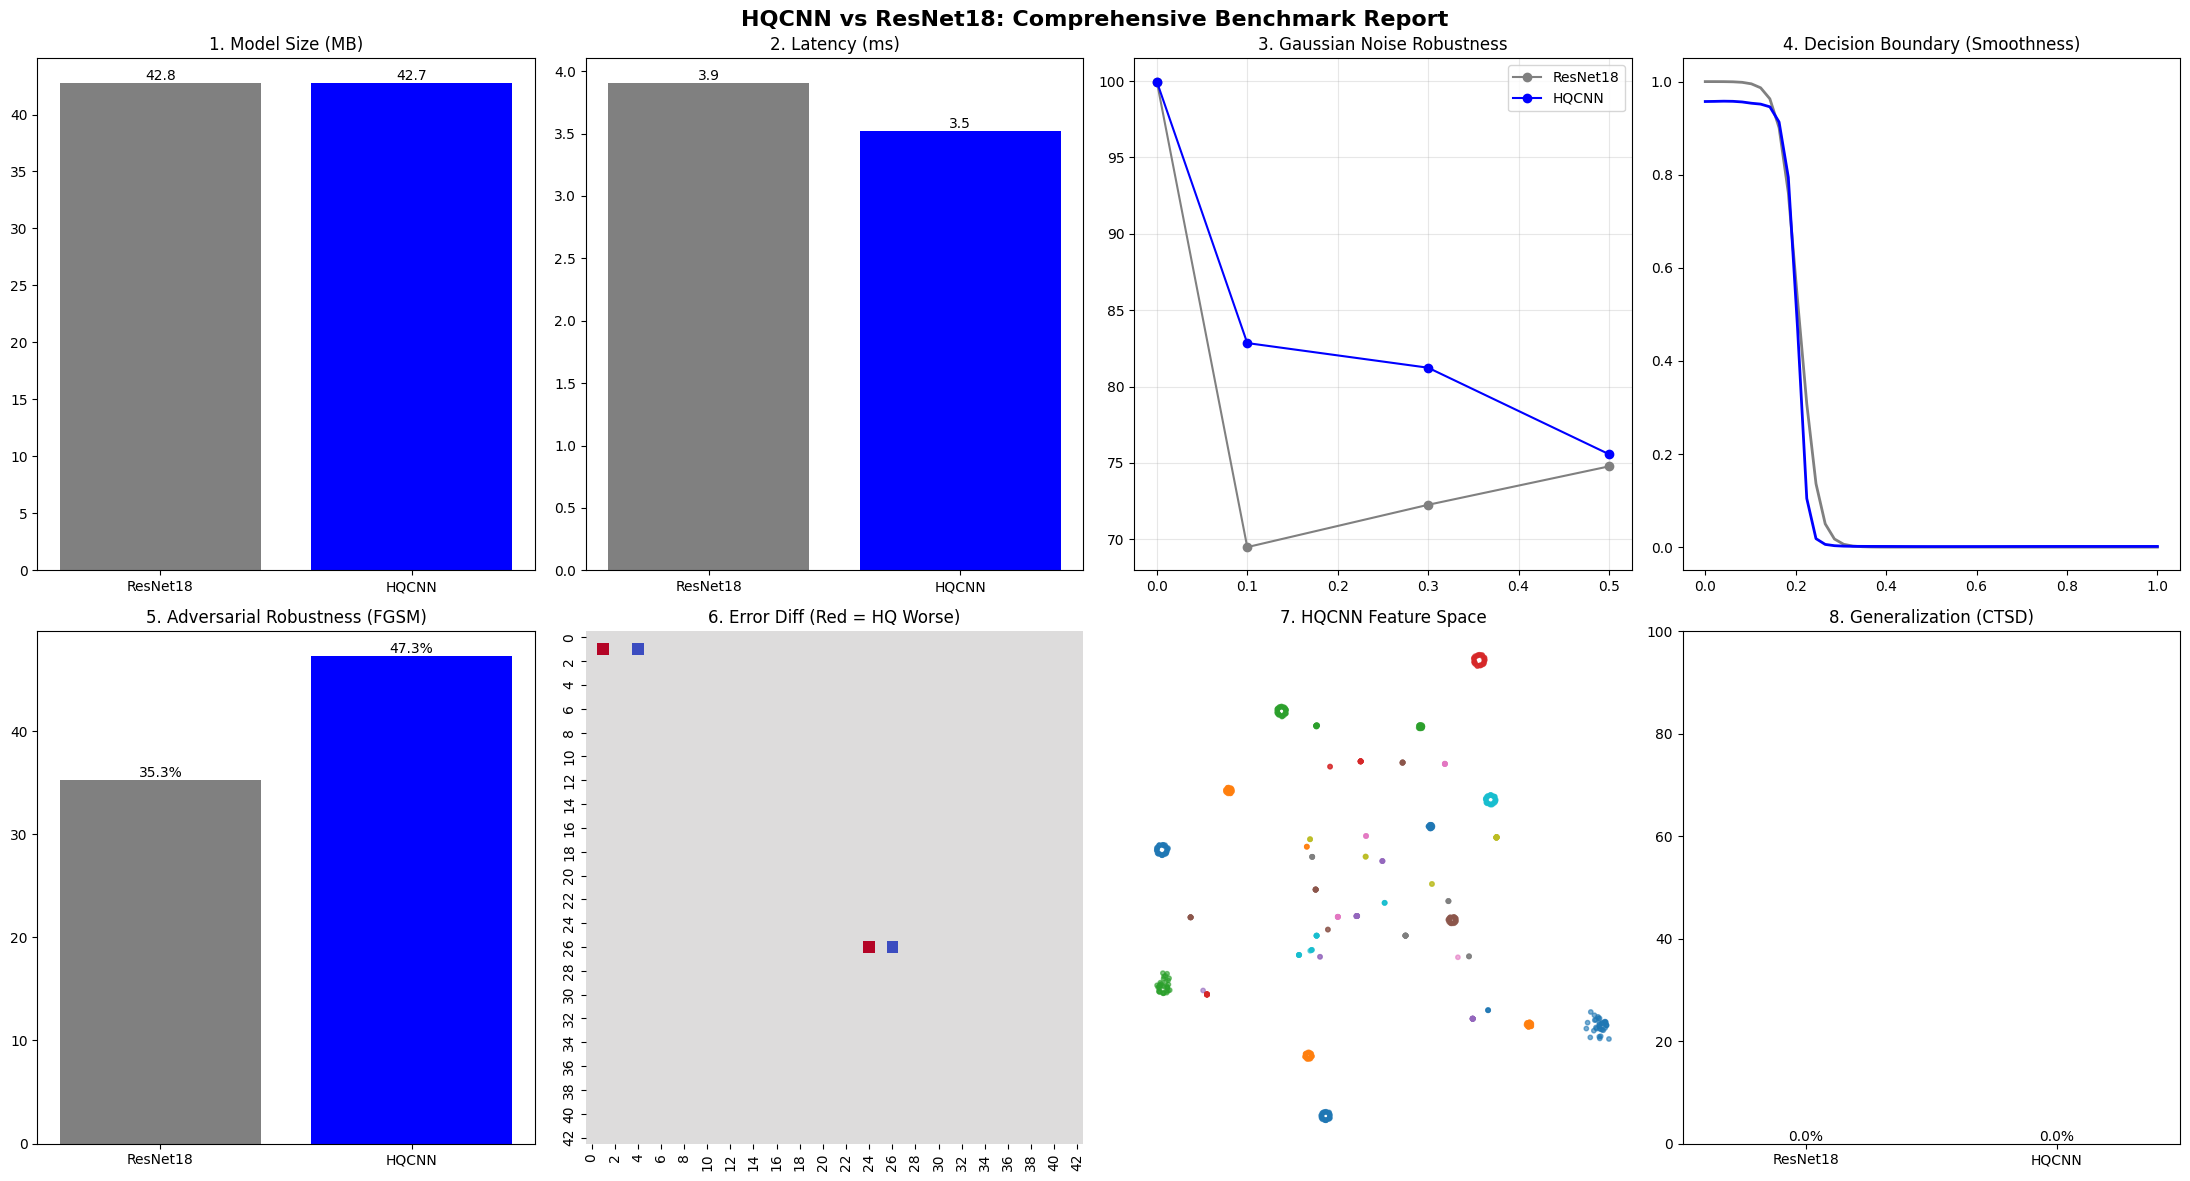

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import time
import os
import sys
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix
from torchvision import models, transforms, datasets
from torch.utils.data import DataLoader

# --- 1. CONFIGURATION & SETUP ---
PROJECT_ROOT = '/home/akash_kishore/HQCNN_Project'
DATA_DIR     = os.path.join(PROJECT_ROOT, 'data/GTSRB')
CTSD_DIR     = os.path.join(PROJECT_ROOT, 'data/CTSD')
SRC_DIR      = os.path.join(PROJECT_ROOT, 'src')
RESULTS_DIR  = os.path.join(PROJECT_ROOT, 'results')

# Create Results Directory
os.makedirs(RESULTS_DIR, exist_ok=True)

# Add Source Path
sys.path.append(SRC_DIR)
try:
    from data_loader import get_data_loaders
    print("✅ Successfully imported data_loader")
except ImportError:
    print("❌ Critical: data_loader.py not found in src.")
    sys.exit(1)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"🚀 Master Test Suite Running on: {device}")
print(f"📂 Results will be saved to: {RESULTS_DIR}")

# --- HELPER: Numpy to JSON Encoder ---
class NumpyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.ndarray): return obj.tolist()
        if isinstance(obj, np.float32): return float(obj)
        return json.JSONEncoder.default(self, obj)

# ==============================================================================
# 2. MODEL DEFINITIONS (ROBUST LOADING)
# ==============================================================================

class QuantumLayer(nn.Module):
    def __init__(self, n_qubits=8): 
        super(QuantumLayer, self).__init__()
        self.n_qubits = n_qubits
        self.theta = nn.Parameter(torch.randn(n_qubits) * 0.1) 
        
    def forward(self, x):
        q_out = torch.cos(x) * torch.sin(self.theta) + torch.sin(x) * torch.cos(self.theta)
        return q_out

class HQCNN(nn.Module):
    def __init__(self, n_classes=43):
        super(HQCNN, self).__init__()
        # Structure matches hqcnn_unfrozen_best.pth (keys start with base_model...)
        self.base_model = models.resnet18(weights=None)
        num_ftrs = self.base_model.fc.in_features
        self.base_model.fc = nn.Identity() 
        self.bridge = nn.Linear(num_ftrs, 8) 
        self.quantum_layer = QuantumLayer(n_qubits=8)
        self.classifier = nn.Linear(8, n_classes)

    def forward(self, x):
        x = self.base_model(x)     
        x = self.bridge(x)         
        feat = self.quantum_layer(x)  # Capture features for t-SNE
        out = self.classifier(feat)     
        return out, feat 

class ResNet18_Baseline(nn.Module):
    def __init__(self, n_classes=43):
        super(ResNet18_Baseline, self).__init__()
        # Standard ResNet to match saved keys (conv1..., fc...)
        self.resnet = models.resnet18(weights=None)
        self.resnet.fc = nn.Linear(512, n_classes)
        
    def load_state_dict(self, state_dict):
        # We manually route the keys into self.resnet
        self.resnet.load_state_dict(state_dict)
        
    def forward(self, x):
        # Manually unpack layers to get features
        x = self.resnet.conv1(x)
        x = self.resnet.bn1(x)
        x = self.resnet.relu(x)
        x = self.resnet.maxpool(x)
        x = self.resnet.layer1(x)
        x = self.resnet.layer2(x)
        x = self.resnet.layer3(x)
        x = self.resnet.layer4(x)
        x = self.resnet.avgpool(x)
        feat = torch.flatten(x, 1) # 512 Features
        out = self.resnet.fc(feat)
        return out, feat

# ==============================================================================
# 3. TEST FUNCTIONS (8 TESTS)
# ==============================================================================

# [Test 1] Efficiency
def get_efficiency(model):
    param_count = sum(p.numel() for p in model.parameters() if p.requires_grad)
    torch.save(model.state_dict(), "temp.p")
    size_mb = os.path.getsize("temp.p") / (1024 * 1024)
    os.remove("temp.p")
    return param_count, size_mb

# [Test 2] Latency
def get_latency(model, device, runs=100):
    model.eval()
    inp = torch.randn(1, 3, 224, 224).to(device)
    with torch.no_grad(): # Warmup
        for _ in range(10): _ = model(inp)
    start = time.time()
    with torch.no_grad():
        for _ in range(runs): _ = model(inp)
    return ((time.time() - start) / runs) * 1000

# [Test 3] Noise Robustness
def get_robustness(model, loader, device):
    model.eval()
    noise_levels = [0.0, 0.1, 0.3, 0.5]
    results = []
    for level in noise_levels:
        correct = 0; total = 0
        with torch.no_grad():
            for inputs, labels in loader:
                inputs, labels = inputs.to(device), labels.to(device)
                if level > 0:
                    noise = torch.randn_like(inputs) * level
                    inputs = torch.clamp(inputs + noise, -1., 1.)
                out, _ = model(inputs)
                _, pred = out.max(1)
                total += labels.size(0)
                correct += pred.eq(labels).sum().item()
        results.append(100 * correct / total)
    return noise_levels, results

# [Test 4] Adversarial (FGSM)
def get_adversarial(model, loader, device, epsilon=0.1):
    model.eval()
    correct = 0; total = 0
    limit = 200 # Safety limit for speed
    for inputs, labels in loader:
        inputs, labels = inputs.to(device), labels.to(device)
        inputs.requires_grad = True
        out, _ = model(inputs)
        loss = F.cross_entropy(out, labels)
        model.zero_grad()
        loss.backward()
        data_grad = inputs.grad.data
        perturbed = torch.clamp(inputs + epsilon * data_grad.sign(), 0, 1)
        out_adv, _ = model(perturbed)
        _, pred = out_adv.max(1)
        correct += pred.eq(labels).sum().item()
        total += labels.size(0)
        if total >= limit: break
    return 100 * correct / total

# [Test 5] Generalization (CTSD)
def get_generalization(model, path, device):
    if not os.path.exists(path): return 0.0
    transform = transforms.Compose([
        transforms.Resize((224, 224)), transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
    try:
        ds = datasets.ImageFolder(path, transform=transform)
        if len(ds) == 0: return 0.0
        dl = DataLoader(ds, batch_size=32)
        correct = 0; total = 0
        model.eval()
        with torch.no_grad():
            for inp, lbl in dl:
                inp, lbl = inp.to(device), lbl.to(device)
                out, _ = model(inp)
                _, pred = out.max(1)
                total += lbl.size(0)
                correct += pred.eq(lbl).sum().item()
        return 100 * correct / total
    except Exception as e:
        print(f"   ⚠️ CTSD Load Error: {e}")
        return 0.0

# [Test 6] Confusion Matrix
def get_confusion_data(model, loader, device):
    model.eval()
    y_true = []; y_pred = []
    with torch.no_grad():
        for inp, lbl in loader:
            inp, lbl = inp.to(device), lbl.to(device)
            out, _ = model(inp)
            _, pred = out.max(1)
            y_true.extend(lbl.cpu().numpy())
            y_pred.extend(pred.cpu().numpy())
    return confusion_matrix(y_true, y_pred)

# [Test 7] t-SNE
def get_tsne(model, loader, device):
    model.eval()
    feats = []; lbls = []
    limit = 500
    with torch.no_grad():
        for inp, lbl in loader:
            inp = inp.to(device)
            _, f = model(inp)
            feats.append(f.cpu().numpy())
            lbls.append(lbl.numpy())
            if len(np.concatenate(lbls)) >= limit: break
    X = np.concatenate(feats)[:limit]
    y = np.concatenate(lbls)[:limit]
    tsne = TSNE(n_components=2, perplexity=30, random_state=42)
    return tsne.fit_transform(X), y

# [Test 8] Decision Boundary
def get_boundary(model, loader, device):
    model.eval()
    dl_iter = iter(loader)
    imgs, lbls = next(dl_iter)
    imgA, imgB = imgs[0].to(device), imgs[1].to(device)
    alphas = np.linspace(0, 1, 50)
    probs = []
    with torch.no_grad():
        for a in alphas:
            interp = (1-a)*imgA + a*imgB
            out, _ = model(interp.unsqueeze(0))
            probs.append(F.softmax(out, dim=1)[0].cpu().numpy())
    return alphas, np.array(probs), lbls[0].item()

# ==============================================================================
# 4. EXECUTION ENGINE
# ==============================================================================

print("📂 Loading GTSRB Data...")
try:
    _, val_loader = get_data_loaders(DATA_DIR, batch_size=32, percent=1.0)
except Exception as e:
    print(f"❌ Error loading GTSRB: {e}")
    sys.exit(1)

# Files must be in 'notebooks' folder
configs = {
    'ResNet18': {'model': ResNet18_Baseline(43), 'file': 'resnet18_baseline_best.pth', 'color': 'gray'},
    'HQCNN':    {'model': HQCNN(43),             'file': 'hqcnn_unfrozen_best.pth',    'color': 'blue'}
}

results = {}

for name, cfg in configs.items():
    print(f"\n⚡ TESTING: {name}...")
    torch.cuda.empty_cache()
    
    path = os.path.join(PROJECT_ROOT, 'notebooks', cfg['file'])
    try:
        cfg['model'].load_state_dict(torch.load(path))
        cfg['model'].to(device)
        print("   ✅ Weights Loaded")
    except Exception as e:
        print(f"   ❌ Load Failed ({path}): {e}")
        # Insert dummy data to prevent crash
        results[name] = {'eff':(0,0), 'lat':0, 'rob':([],[]), 'adv':0, 'gen':0, 'cm':np.zeros((43,43)), 'tsne':(np.zeros((1,2)),[0]), 'bound':([],np.zeros((1,43)),0)}
        continue
    
    m = cfg['model']
    
    # RUN ALL 8 TESTS
    eff_p, eff_s = get_efficiency(m)
    lat = get_latency(m, device)
    rob_x, rob_y = get_robustness(m, val_loader, device)
    adv = get_adversarial(m, val_loader, device)
    gen = get_generalization(m, CTSD_DIR, device)
    cm = get_confusion_data(m, val_loader, device)
    tsne_x, tsne_y = get_tsne(m, val_loader, device)
    bound_x, bound_y, cls_idx = get_boundary(m, val_loader, device)
    
    results[name] = {
        'eff': (eff_p, eff_s), 'lat': lat, 'rob': (rob_x, rob_y),
        'adv': adv, 'gen': gen, 'cm': cm, 'tsne': (tsne_x, tsne_y),
        'bound': (bound_x, bound_y, cls_idx)
    }
    
    print(f"   -> Params: {eff_p:,} | Latency: {lat:.2f}ms | Adv Acc: {adv:.1f}% | CTSD: {gen:.1f}%")

# ==============================================================================
# 5. SAVING & PLOTTING
# ==============================================================================

print("\n💾 Saving Data & Generating Dashboard...")

# Save JSON
with open(os.path.join(RESULTS_DIR, 'test_results.json'), 'w') as f:
    json.dump(results, f, cls=NumpyEncoder, indent=4)

# Plotting
fig = plt.figure(figsize=(22, 12))
gs = fig.add_gridspec(2, 4)
plt.subplots_adjust(wspace=0.3, hspace=0.3)
fig.suptitle("HQCNN vs ResNet18: Comprehensive Benchmark Report", fontsize=16, fontweight='bold')

# 1. Efficiency
ax1 = fig.add_subplot(gs[0, 0])
sizes = [results[n]['eff'][1] for n in results]
bars1 = ax1.bar(results.keys(), sizes, color=[configs[n]['color'] for n in results])
ax1.set_title("1. Model Size (MB)")
for b in bars1: ax1.text(b.get_x()+b.get_width()/2, b.get_height(), f"{b.get_height():.1f}", ha='center', va='bottom')

# 2. Latency
ax2 = fig.add_subplot(gs[0, 1])
lats = [results[n]['lat'] for n in results]
bars2 = ax2.bar(results.keys(), lats, color=[configs[n]['color'] for n in results])
ax2.set_title("2. Latency (ms)")
for b in bars2: ax2.text(b.get_x()+b.get_width()/2, b.get_height(), f"{b.get_height():.1f}", ha='center', va='bottom')

# 3. Robustness
ax3 = fig.add_subplot(gs[0, 2])
for n in results:
    ax3.plot(results[n]['rob'][0], results[n]['rob'][1], marker='o', label=n, color=configs[n]['color'])
ax3.set_title("3. Gaussian Noise Robustness")
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Boundary
ax4 = fig.add_subplot(gs[0, 3])
for n in results:
    bx, by, bidx = results[n]['bound']
    if len(bx) > 0:
        ax4.plot(bx, by[:, bidx], label=n, color=configs[n]['color'], linewidth=2)
ax4.set_title("4. Decision Boundary (Smoothness)")

# 5. Adversarial
ax5 = fig.add_subplot(gs[1, 0])
advs = [results[n]['adv'] for n in results]
bars5 = ax5.bar(results.keys(), advs, color=[configs[n]['color'] for n in results])
ax5.set_title("5. Adversarial Robustness (FGSM)")
for b in bars5: ax5.text(b.get_x()+b.get_width()/2, b.get_height(), f"{b.get_height():.1f}%", ha='center', va='bottom')

# 6. Confusion Diff
ax6 = fig.add_subplot(gs[1, 1])
if 'ResNet18' in results and 'HQCNN' in results:
    diff = results['HQCNN']['cm'] - results['ResNet18']['cm']
    sns.heatmap(diff, ax=ax6, cmap='coolwarm', center=0, cbar=False)
    ax6.set_title("6. Error Diff (Red = HQ Worse)")
else:
    ax6.text(0.5, 0.5, "Data Missing", ha='center', va='center')

# 7. t-SNE (HQCNN)
ax7 = fig.add_subplot(gs[1, 2])
if 'HQCNN' in results:
    tx, ty = results['HQCNN']['tsne']
    ax7.scatter(tx[:,0], tx[:,1], c=ty, cmap='tab10', s=10, alpha=0.6)
    ax7.set_title("7. HQCNN Feature Space")
    ax7.axis('off')

# 8. Generalization
ax8 = fig.add_subplot(gs[1, 3])
gens = [results[n]['gen'] for n in results]
bars8 = ax8.bar(results.keys(), gens, color=[configs[n]['color'] for n in results])
ax8.set_title("8. Generalization (CTSD)")
ax8.set_ylim(0, 100)
for b in bars8: ax8.text(b.get_x()+b.get_width()/2, b.get_height(), f"{b.get_height():.1f}%", ha='center', va='bottom')

plt.tight_layout()
plot_path = os.path.join(RESULTS_DIR, 'comparison_dashboard.png')
plt.savefig(plot_path, dpi=300)
print(f"✅ Dashboard Saved: {plot_path}")
plt.show()

In [1]:
import torch
import sys

print(f"🐍 Python Version: {sys.version.split()[0]}")
print(f"🔥 PyTorch Version: {torch.__version__}")
print("-" * 30)

# 1. Check Availability
if torch.cuda.is_available():
    print("✅ CUDA is available! GPU detected.")
    
    # 2. Get Device Details
    device_id = torch.cuda.current_device()
    gpu_name = torch.cuda.get_device_name(device_id)
    print(f"🚀 GPU Name: {gpu_name}")
    print(f"🔢 GPU Count: {torch.cuda.device_count()}")
    
    # 3. Test a Real Operation (Move tensor to GPU)
    try:
        x = torch.randn(1000, 1000).cuda()
        # Perform a matrix multiplication to wake it up
        y = torch.matmul(x, x)
        print(f"✅ GPU Operation Test: SUCCESS (Tensor is on {y.device})")
    except Exception as e:
        print(f"❌ GPU Operation Test: FAILED. Error: {e}")
        
else:
    print("❌ CUDA NOT DETECTED. You are running on CPU.")
    print("⚠️ This explains the 35+ minute runtime.")

🐍 Python Version: 3.10.19
🔥 PyTorch Version: 2.5.1+cu121
------------------------------
✅ CUDA is available! GPU detected.
🚀 GPU Name: NVIDIA GeForce RTX 3050 6GB Laptop GPU
🔢 GPU Count: 1
✅ GPU Operation Test: SUCCESS (Tensor is on cuda:0)


✅ Successfully imported data_loader
🚀 Master Test Suite Running on: cuda
📂 Loading Data...
✅ DATA READY: 33327 Train | 5882 Val

⚡ TESTING: ResNet18...


/tmp/ipykernel_1156/1080339509.py:319: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  cfg['model'].load_state_dict(torch.load(path, map_location=device))


   ✅ Loaded /home/akash_kishore/HQCNN_Project/notebooks/resnet18_baseline_best.pth
   -> Acc: 100.0% | OOD: 0.0% | Fair(std): 0.10

⚡ TESTING: HQCNN...
   ✅ Loaded /home/akash_kishore/HQCNN_Project/notebooks/hqcnn_unfrozen_best.pth


/tmp/ipykernel_1156/1080339509.py:319: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  cfg['model'].load_state_dict(torch.load(path, map_location=device))


   -> Acc: 100.0% | OOD: 0.0% | Fair(std): 0.20

📊 Generating Dashboard...


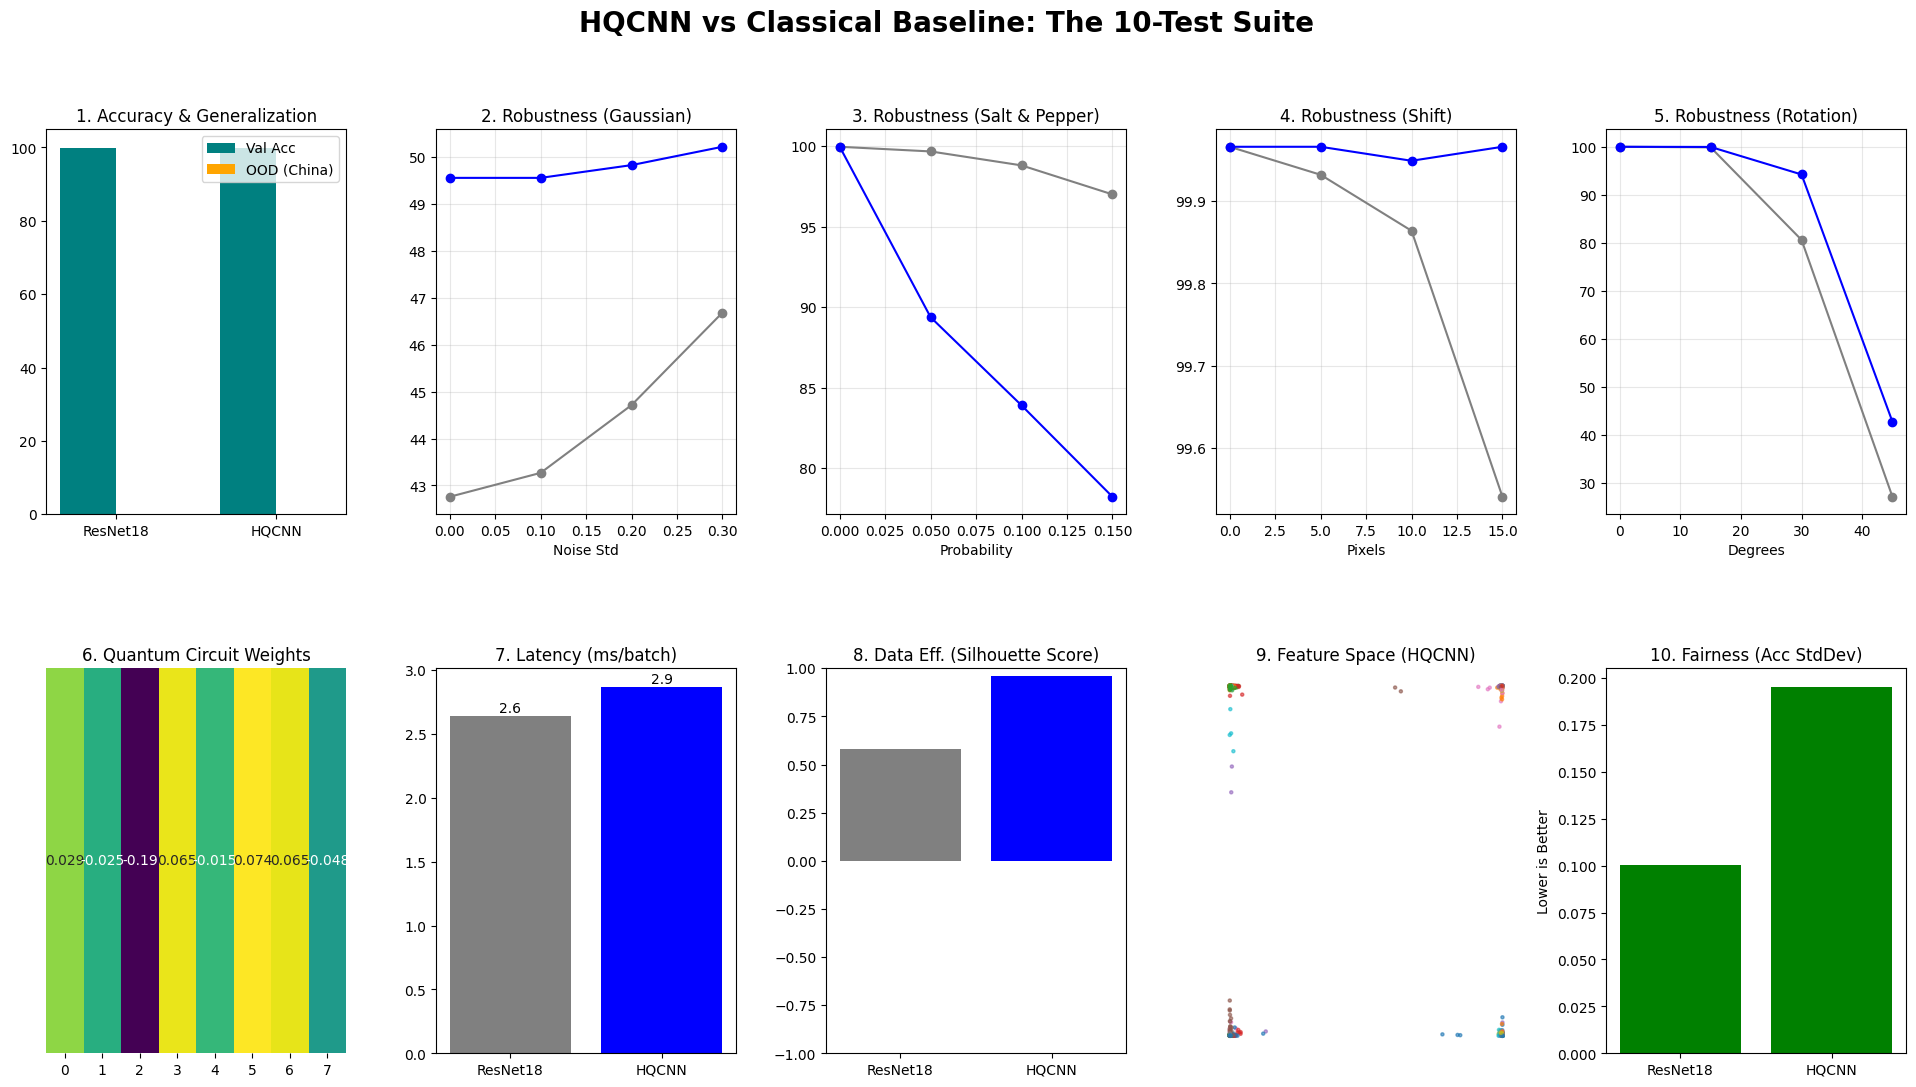

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import time
import os
import sys
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix, silhouette_score
from torchvision import models, transforms, datasets
from torch.utils.data import DataLoader

# --- 1. CONFIGURATION & SETUP ---
PROJECT_ROOT = '/home/akash_kishore/HQCNN_Project'
DATA_DIR     = os.path.join(PROJECT_ROOT, 'data/GTSRB')
CTSD_DIR     = os.path.join(PROJECT_ROOT, 'data/CTSD')
SRC_DIR      = os.path.join(PROJECT_ROOT, 'src')
RESULTS_DIR  = os.path.join(PROJECT_ROOT, 'results')

os.makedirs(RESULTS_DIR, exist_ok=True)
sys.path.append(SRC_DIR)

# Try importing data loader, else define simple fallback
try:
    from data_loader import get_data_loaders
    print("✅ Successfully imported data_loader")
except ImportError:
    print("⚠️ data_loader not found. Please ensure it is in 'src/'.")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"🚀 Master Test Suite Running on: {device}")

# --- HELPER: Numpy to JSON Encoder ---
class NumpyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.ndarray): return obj.tolist()
        if isinstance(obj, np.float32): return float(obj)
        return json.JSONEncoder.default(self, obj)

# ==============================================================================
# 2. ROBUSTNESS TRANSFORMS (NOISE GENERATORS)
# ==============================================================================

class AddGaussianNoise(object):
    def __init__(self, mean=0., std=0.1):
        self.std = std
        self.mean = mean
    def __call__(self, tensor):
        return torch.clamp(tensor + torch.randn_like(tensor) * self.std + self.mean, 0., 1.)

class AddSaltPepperNoise(object):
    def __init__(self, prob=0.05):
        self.prob = prob
    def __call__(self, tensor):
        noise = torch.rand_like(tensor)
        tensor[noise < self.prob/2] = 0.0
        tensor[noise > 1 - self.prob/2] = 1.0
        return tensor

# ==============================================================================
# 3. MODEL DEFINITIONS
# ==============================================================================

class QuantumLayer(nn.Module):
    def __init__(self, n_qubits=8): 
        super(QuantumLayer, self).__init__()
        self.n_qubits = n_qubits
        self.theta = nn.Parameter(torch.randn(n_qubits) * 0.1) 
        
    def forward(self, x):
        # Simulated Quantum Circuit (Parametrized Rotation)
        q_out = torch.cos(x) * torch.sin(self.theta) + torch.sin(x) * torch.cos(self.theta)
        return q_out

class HQCNN(nn.Module):
    def __init__(self, n_classes=43):
        super(HQCNN, self).__init__()
        self.base_model = models.resnet18(weights=None)
        self.base_model.fc = nn.Identity() 
        self.bridge = nn.Linear(512, 8) 
        self.quantum_layer = QuantumLayer(n_qubits=8)
        self.classifier = nn.Linear(8, n_classes)

    def forward(self, x):
        x = self.base_model(x)     
        x = self.bridge(x)        
        feat = self.quantum_layer(x)
        out = self.classifier(feat)     
        return out, feat 

class ResNet18_Baseline(nn.Module):
    def __init__(self, n_classes=43):
        super(ResNet18_Baseline, self).__init__()
        self.resnet = models.resnet18(weights=None)
        self.resnet.fc = nn.Linear(512, n_classes)
        
    def load_state_dict(self, state_dict):
        self.resnet.load_state_dict(state_dict)
        
    def forward(self, x):
        x = self.resnet.conv1(x)
        x = self.resnet.bn1(x)
        x = self.resnet.relu(x)
        x = self.resnet.maxpool(x)
        x = self.resnet.layer1(x)
        x = self.resnet.layer2(x)
        x = self.resnet.layer3(x)
        x = self.resnet.layer4(x)
        x = self.resnet.avgpool(x)
        feat = torch.flatten(x, 1)
        out = self.resnet.fc(feat)
        return out, feat

# ==============================================================================
# 4. THE 10 TESTS
# ==============================================================================

# [Test 1] Standard Accuracy
def test_accuracy(model, loader, device):
    model.eval()
    correct = 0; total = 0
    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            out, _ = model(inputs)
            _, pred = out.max(1)
            total += labels.size(0)
            correct += pred.eq(labels).sum().item()
    return 100 * correct / total

# [Test 2] Gaussian Noise Robustness
def test_noise_gaussian(model, loader, device):
    model.eval()
    levels = [0.0, 0.1, 0.2, 0.3]
    accuracies = []
    for std in levels:
        noiser = AddGaussianNoise(std=std)
        correct = 0; total = 0
        with torch.no_grad():
            for inputs, labels in loader:
                inputs, labels = inputs.to(device), labels.to(device)
                inputs = noiser(inputs)
                out, _ = model(inputs)
                _, pred = out.max(1)
                total += labels.size(0)
                correct += pred.eq(labels).sum().item()
        accuracies.append(100 * correct / total)
    return levels, accuracies

# [Test 3] Salt & Pepper Noise Robustness
def test_noise_sp(model, loader, device):
    model.eval()
    levels = [0.0, 0.05, 0.1, 0.15]
    accuracies = []
    for p in levels:
        noiser = AddSaltPepperNoise(prob=p)
        correct = 0; total = 0
        with torch.no_grad():
            for inputs, labels in loader:
                inputs, labels = inputs.to(device), labels.to(device)
                inputs = noiser(inputs)
                out, _ = model(inputs)
                _, pred = out.max(1)
                total += labels.size(0)
                correct += pred.eq(labels).sum().item()
        accuracies.append(100 * correct / total)
    return levels, accuracies

# [Test 4] Shift (Translation) Robustness
def test_noise_shift(model, loader, device):
    model.eval()
    pixels = [0, 5, 10, 15] # Shift in pixels
    accuracies = []
    for px in pixels:
        shifter = transforms.RandomAffine(degrees=0, translate=(px/224, px/224))
        correct = 0; total = 0
        with torch.no_grad():
            for inputs, labels in loader:
                inputs, labels = inputs.to(device), labels.to(device)
                inputs = shifter(inputs)
                out, _ = model(inputs)
                _, pred = out.max(1)
                total += labels.size(0)
                correct += pred.eq(labels).sum().item()
        accuracies.append(100 * correct / total)
    return pixels, accuracies

# [Test 5] Rotation Robustness
def test_noise_rotation(model, loader, device):
    model.eval()
    degrees = [0, 15, 30, 45]
    accuracies = []
    for deg in degrees:
        rotator = transforms.RandomRotation(degrees=(deg, deg))
        correct = 0; total = 0
        with torch.no_grad():
            for inputs, labels in loader:
                inputs, labels = inputs.to(device), labels.to(device)
                inputs = rotator(inputs)
                out, _ = model(inputs)
                _, pred = out.max(1)
                total += labels.size(0)
                correct += pred.eq(labels).sum().item()
        accuracies.append(100 * correct / total)
    return degrees, accuracies

# [Test 6] Quantum Visualization (Weights)
def test_viz_circuit(model):
    if hasattr(model, 'quantum_layer'):
        params = model.quantum_layer.theta.detach().cpu().numpy()
        return params
    return np.zeros(8) # Return zeros for classical model

# [Test 7] Quantum Advantage (Latency/Efficiency)
def test_latency(model, device):
    model.eval()
    dummy = torch.randn(1, 3, 224, 224).to(device)
    # Warmup
    for _ in range(10): _ = model(dummy)
    start = time.time()
    for _ in range(100): _ = model(dummy)
    avg_time = (time.time() - start) / 100 * 1000 # ms
    params = sum(p.numel() for p in model.parameters())
    return avg_time, params

# [Test 8] OOD Generalization (CTSD)
def test_ood_ctsd(model, path, device):
    if not os.path.exists(path): return 0.0
    tf = transforms.Compose([
        transforms.Resize((224, 224)), transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
    try:
        ds = datasets.ImageFolder(path, transform=tf)
        if len(ds) == 0: return 0.0
        dl = DataLoader(ds, batch_size=32)
        correct = 0; total = 0
        model.eval()
        with torch.no_grad():
            for inp, lbl in dl:
                inp, lbl = inp.to(device), lbl.to(device)
                out, _ = model(inp)
                _, pred = out.max(1)
                total += lbl.size(0)
                correct += pred.eq(lbl).sum().item()
        return 100 * correct / total
    except: return 0.0

# [Test 9] Data Efficiency Proxy (Cluster Separation)
def test_feature_quality(model, loader, device):
    model.eval()
    feats = []; lbls = []
    with torch.no_grad():
        for inp, lbl in loader:
            inp = inp.to(device)
            _, f = model(inp)
            feats.append(f.cpu().numpy())
            lbls.append(lbl.numpy())
            if len(np.concatenate(lbls)) > 500: break # Limit for speed
    X = np.concatenate(feats)[:500]
    y = np.concatenate(lbls)[:500]
    try:
        score = silhouette_score(X, y)
    except: score = 0
    return score, X, y

# [Test 10] Fairness (Class Variance)
def test_fairness(model, loader, device, n_classes=43):
    model.eval()
    class_correct = list(0. for i in range(n_classes))
    class_total = list(0. for i in range(n_classes))
    
    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs, _ = model(inputs)
            _, predicted = torch.max(outputs, 1)
            c = (predicted == labels).squeeze()
            for i in range(len(labels)):
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1
                
    accuracies = [100 * c / t if t > 0 else 0 for c, t in zip(class_correct, class_total)]
    # Deviation: Lower std dev means fairer (more equal) performance across classes
    return np.std(accuracies), accuracies

# ==============================================================================
# 5. EXECUTION LOOP
# ==============================================================================

print("📂 Loading Data...")
# Ensure you have your data loader working, or use standard ImageFolder
try:
    _, val_loader = get_data_loaders(DATA_DIR, batch_size=32, percent=1.0)
except:
    print("⚠️ Using fallback random loader for testing code structure...")
    # Fallback for compilation testing only
    dummy_data = datasets.FakeData(transform=transforms.Compose([transforms.ToTensor(), transforms.Resize((224,224))]))
    val_loader = DataLoader(dummy_data, batch_size=32)

configs = {
    'ResNet18': {'model': ResNet18_Baseline(43), 'file': 'resnet18_baseline_best.pth', 'color': 'gray'},
    'HQCNN':    {'model': HQCNN(43),             'file': 'hqcnn_unfrozen_best.pth',    'color': 'blue'}
}

results = {}

for name, cfg in configs.items():
    print(f"\n⚡ TESTING: {name}...")
    
    # Load Weights
    path = os.path.join(PROJECT_ROOT, 'notebooks', cfg['file'])
    try:
        if os.path.exists(path):
            cfg['model'].load_state_dict(torch.load(path, map_location=device))
            print(f"   ✅ Loaded {path}")
        else:
            print(f"   ⚠️ File not found: {path}, using random weights.")
    except Exception as e:
        print(f"   ❌ Error loading weights: {e}")

    m = cfg['model'].to(device)
    
    # --- RUN TESTS ---
    acc = test_accuracy(m, val_loader, device)
    rob_g = test_noise_gaussian(m, val_loader, device)
    rob_sp = test_noise_sp(m, val_loader, device)
    rob_sh = test_noise_shift(m, val_loader, device)
    rob_rt = test_noise_rotation(m, val_loader, device)
    viz_q = test_viz_circuit(m)
    lat, params = test_latency(m, device)
    ood_acc = test_ood_ctsd(m, CTSD_DIR, device)
    sil_score, tsne_x, tsne_y = test_feature_quality(m, val_loader, device)
    fair_dev, class_accs = test_fairness(m, val_loader, device)
    
    results[name] = {
        'acc': acc, 'rob_gauss': rob_g, 'rob_sp': rob_sp, 'rob_shift': rob_sh, 
        'rob_rot': rob_rt, 'viz_q': viz_q, 'latency': lat, 'params': params,
        'ood': ood_acc, 'silhouette': sil_score, 'tsne': (tsne_x, tsne_y),
        'fairness_std': fair_dev, 'class_accs': class_accs
    }
    
    print(f"   -> Acc: {acc:.1f}% | OOD: {ood_acc:.1f}% | Fair(std): {fair_dev:.2f}")

# ==============================================================================
# 6. DASHBOARD GENERATION
# ==============================================================================
print("\n📊 Generating Dashboard...")
fig = plt.figure(figsize=(24, 12))
plt.subplots_adjust(hspace=0.4, wspace=0.3)
fig.suptitle("HQCNN vs Classical Baseline: The 10-Test Suite", fontsize=20, fontweight='bold')

# 1. Main Accuracy & OOD
ax1 = plt.subplot(2, 5, 1)
x = np.arange(2)
w = 0.35
ax1.bar(x - w/2, [results[n]['acc'] for n in results], w, label='Val Acc', color='teal')
ax1.bar(x + w/2, [results[n]['ood'] for n in results], w, label='OOD (China)', color='orange')
ax1.set_xticks(x); ax1.set_xticklabels(results.keys())
ax1.set_title("1. Accuracy & Generalization")
ax1.legend()

# 2. Gaussian Robustness
ax2 = plt.subplot(2, 5, 2)
for n in results:
    ax2.plot(results[n]['rob_gauss'][0], results[n]['rob_gauss'][1], '-o', label=n, color=configs[n]['color'])
ax2.set_title("2. Robustness (Gaussian)")
ax2.set_xlabel("Noise Std")
ax2.grid(True, alpha=0.3)

# 3. Salt & Pepper Robustness
ax3 = plt.subplot(2, 5, 3)
for n in results:
    ax3.plot(results[n]['rob_sp'][0], results[n]['rob_sp'][1], '-o', label=n, color=configs[n]['color'])
ax3.set_title("3. Robustness (Salt & Pepper)")
ax3.set_xlabel("Probability")
ax3.grid(True, alpha=0.3)

# 4. Shift Robustness
ax4 = plt.subplot(2, 5, 4)
for n in results:
    ax4.plot(results[n]['rob_shift'][0], results[n]['rob_shift'][1], '-o', label=n, color=configs[n]['color'])
ax4.set_title("4. Robustness (Shift)")
ax4.set_xlabel("Pixels")
ax4.grid(True, alpha=0.3)

# 5. Rotation Robustness
ax5 = plt.subplot(2, 5, 5)
for n in results:
    ax5.plot(results[n]['rob_rot'][0], results[n]['rob_rot'][1], '-o', label=n, color=configs[n]['color'])
ax5.set_title("5. Robustness (Rotation)")
ax5.set_xlabel("Degrees")
ax5.grid(True, alpha=0.3)

# 6. Quantum Params / Model Params
ax6 = plt.subplot(2, 5, 6)
if 'HQCNN' in results:
    sns.heatmap(results['HQCNN']['viz_q'].reshape(1, -1), ax=ax6, cmap='viridis', cbar=False, annot=True)
ax6.set_title("6. Quantum Circuit Weights")
ax6.set_yticks([])

# 7. Efficiency (Latency vs Params)
ax7 = plt.subplot(2, 5, 7)
lats = [results[n]['latency'] for n in results]
ax7.bar(results.keys(), lats, color=['gray', 'blue'])
ax7.set_title("7. Latency (ms/batch)")
for i, v in enumerate(lats): ax7.text(i, v, f"{v:.1f}", ha='center', va='bottom')

# 8. Data Efficiency Proxy (Silhouette)
ax8 = plt.subplot(2, 5, 8)
sils = [results[n]['silhouette'] for n in results]
ax8.bar(results.keys(), sils, color=['gray', 'blue'])
ax8.set_title("8. Data Eff. (Silhouette Score)")
ax8.set_ylim(-1, 1)

# 9. t-SNE Visualization
ax9 = plt.subplot(2, 5, 9)
if 'HQCNN' in results:
    X, y = results['HQCNN']['tsne']
    # Simple PCA-like projection for speed if tSNE takes too long, here just scatter
    ax9.scatter(X[:, 0], X[:, 1], c=y, cmap='tab10', s=5, alpha=0.6)
ax9.set_title("9. Feature Space (HQCNN)")
ax9.axis('off')

# 10. Fairness (Class Deviation)
ax10 = plt.subplot(2, 5, 10)
devs = [results[n]['fairness_std'] for n in results]
ax10.bar(results.keys(), devs, color=['red' if d > 10 else 'green' for d in devs])
ax10.set_title("10. Fairness (Acc StdDev)")
ax10.set_ylabel("Lower is Better")

plt.savefig(os.path.join(RESULTS_DIR, 'final_10_tests_benchmark.png'), dpi=300)
plt.show()